In [ ]:
!pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (4.14.3)


In [ ]:
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving ML_preprocess_data_v2.csv to ML_preprocess_data_v2 (1).csv
User uploaded file "ML_preprocess_data_v2.csv" with length 18012281 bytes


In [ ]:
#df=pd.read_csv('ML_preprocess_data.csv')
df=pd.read_csv('ML_preprocess_data_v2.csv')

In [ ]:
df.head(5)

,Target,Enrollment,Gender,StudyType,FundedBys_Others,FundedBys_Industries,FundedBys_NIH,FundedBys_USA_FED,StudyDesign1,StudyDesign2,StudyDesign3,StudyDesign4,StudyDesign5,StudyDesign6,StudyDesign7,StudyDesign8,StudyDesign9,StudyDesign10,StudyDesign11,StudyDesign12,StudyDesign13,StudyDesign14,StudyDesign15,StudyDesign16,StudyDesign17,StudyDesign18,StudyDesign19,StudyDesign20,StudyDesign21,StudyDesign22,StudyDesign23,StudyDesign24,StudyDesign25,StudyDesign26,StudyDesign27,StudyDesign28,StudyDesign29,StudyDesign30,StudyDesign31,StudyDesign32,...,StudyDesign56,BasicScience,DeviceFeasibility,Diagnostic,Health Services Research,Other,Prevention,Screening,SupportiveCare,PrimaryPurposeMissing,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
0,1,7.0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,1,0.002222,0.002222,0.002222,0.002222,0.086691,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222,0.110866,0.002222,0.002222,0.305871,0.002222,0.275135,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222,0.002222,0.165881
1,1,1.0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,1,0.561842,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.334454,0.003704,0.003704
2,1,100.0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,1,0.003333,0.003333,0.003333,0.675079,0.231588,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333
3,0,12.0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,1,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.451532,0.004167,0.004167,0.004167,0.004167,0.431802,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167
4,1,99.0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0,0,0,0,0,0,0,0,1,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.172236,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.505542,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.172222,0.005556,0.005556,0.005556


In [ ]:
X=df.loc[:,df.columns != 'Target']  # All the features 
y=df['Target']   #  Target variables
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1,test_size=0.30)

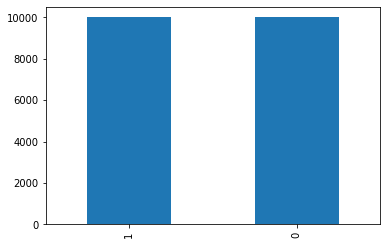

In [ ]:
df['Target'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
print(X_train.shape)

(14000, 102)


In [ ]:
#define the model with keras layer by layer
keras_model=keras.Sequential()
#First hidden layer
keras_model.add(Dense(40,input_dim=102,activation='relu'))
keras_model.add(Dense(20,activation='relu'))
keras_model.add(Dense(1,activation='sigmoid'))              

In [ ]:
#Compiling the model
keras_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#fitting the model
keras_model.fit(X_train,y_train,epochs=10,batch_size=10)

Epoch 1/10
1400/1400 [==============================] - 3s 1ms/step - loss: 3.3964 - accuracy: 0.6772
Epoch 2/10
1400/1400 [==============================] - 2s 1ms/step - loss: 42.2954 - accuracy: 0.7403
Epoch 3/10
1400/1400 [==============================] - 2s 1ms/step - loss: 0.9351 - accuracy: 0.7761
Epoch 4/10
1400/1400 [==============================] - 2s 1ms/step - loss: 0.4703 - accuracy: 0.7881
Epoch 5/10
1400/1400 [==============================] - 2s 1ms/step - loss: 0.4555 - accuracy: 0.7920
Epoch 6/10
1400/1400 [==============================] - 2s 1ms/step - loss: 0.4592 - accuracy: 0.7950
Epoch 7/10
1400/1400 [==============================] - 2s 1ms/step - loss: 0.4551 - accuracy: 0.7887
Epoch 8/10
1400/1400 [==============================] - 2s 1ms/step - loss: 0.4480 - accuracy: 0.7915
Epoch 9/10
1400/1400 [==============================] - 2s 1ms/step - loss: 0.4611 - accuracy: 0.7944
Epoch 10/10
1400/1400 [==============================] - 2s 1ms/step - loss: 0.44

In [ ]:
#Train Accuracy
_,accuracy=keras_model.evaluate(X_train,y_train)
acc=accuracy*100
print("Train Accuracy=", acc)

438/438 [==============================] - 1s 985us/step - loss: 0.4399 - accuracy: 0.7970
Train Accuracy= 79.6999990940094


In [ ]:
y_pred=keras_model.predict_classes(X_test)
test_acc=accuracy_score(y_test,y_pred)
print("Test Accuracy=",test_acc)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Test Accuracy= 0.7845


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[2374  615]
 [ 678 2333]]


In [ ]:
y_pred_keras = keras_model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

In [ ]:
auc_keras = auc(fpr_keras, tpr_keras)

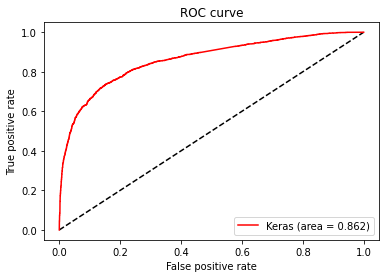

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras),color='red')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()


# Terminated Trial - Average topic probabilities for each primary purpose category

In [ ]:
df2 = pd.DataFrame (y_pred,columns=['Prediction'])
df2

,Prediction
0,1
1,1
2,0
3,0
4,0
...,...
5995,1
5996,1
5997,0
5998,1


In [ ]:
df3 = X_test.loc[:, 'BasicScience':'Topic_29']
df3 = df3.reset_index(drop=True)
df3

,BasicScience,DeviceFeasibility,Diagnostic,Health Services Research,Other,Prevention,Screening,SupportiveCare,PrimaryPurposeMissing,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
0,0,0,0,0,0,1,0,0,0,0.113664,0.004167,0.004167,0.004167,0.004167,0.004167,0.129167,0.004167,0.134539,0.004167,0.004167,0.004167,0.379167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.139297,0.004167,0.004167
1,0,0,0,0,0,0,0,0,1,0.003704,0.003704,0.003704,0.003704,0.528245,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.368052,0.003704,0.003704,0.003704
2,0,0,0,0,0,0,0,0,1,0.004167,0.464493,0.004167,0.004167,0.129167,0.004167,0.293840,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167
3,0,0,0,0,0,1,0,0,0,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.207366,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.305045,0.006667,0.006667,0.006667,0.006667,0.006667,0.307589,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667
4,0,0,0,0,0,0,0,0,1,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.114815,0.353855,0.003704,0.003704,0.431330,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,0,0,0,1,0,0,0,0,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.105864,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.548132,0.003333,0.256004,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333
5996,0,0,0,0,0,0,0,0,1,0.004167,0.004167,0.004167,0.254167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.254167,0.004167,0.004167,0.004167,0.379167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167
5997,0,0,0,0,0,0,0,0,1,0.606667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.206667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667
5998,0,0,0,0,0,0,0,0,1,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.338888,0.005556,0.005556,0.005556,0.005556,0.338887,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.172225,0.005556,0.005556,0.005556


In [ ]:
df4 = pd.concat([df2,df3], axis=1)

In [ ]:
df4

,Prediction,BasicScience,DeviceFeasibility,Diagnostic,Health Services Research,Other,Prevention,Screening,SupportiveCare,PrimaryPurposeMissing,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
0,1,0,0,0,0,0,1,0,0,0,0.113664,0.004167,0.004167,0.004167,0.004167,0.004167,0.129167,0.004167,0.134539,0.004167,0.004167,0.004167,0.379167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.139297,0.004167,0.004167
1,1,0,0,0,0,0,0,0,0,1,0.003704,0.003704,0.003704,0.003704,0.528245,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.368052,0.003704,0.003704,0.003704
2,0,0,0,0,0,0,0,0,0,1,0.004167,0.464493,0.004167,0.004167,0.129167,0.004167,0.293840,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167
3,0,0,0,0,0,0,1,0,0,0,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.207366,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.305045,0.006667,0.006667,0.006667,0.006667,0.006667,0.307589,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667
4,0,0,0,0,0,0,0,0,0,1,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.114815,0.353855,0.003704,0.003704,0.431330,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1,0,0,0,0,1,0,0,0,0,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.105864,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.548132,0.003333,0.256004,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333
5996,1,0,0,0,0,0,0,0,0,1,0.004167,0.004167,0.004167,0.254167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.254167,0.004167,0.004167,0.004167,0.379167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167
5997,0,0,0,0,0,0,0,0,0,1,0.606667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.206667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667
5998,1,0,0,0,0,0,0,0,0,1,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.338888,0.005556,0.005556,0.005556,0.005556,0.338887,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.172225,0.005556,0.005556,0.005556


In [ ]:
df5 = df4.loc[(df4['Prediction']==1)]

In [ ]:
df5

,Prediction,BasicScience,DeviceFeasibility,Diagnostic,Health Services Research,Other,Prevention,Screening,SupportiveCare,PrimaryPurposeMissing,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
0,1,0,0,0,0,0,1,0,0,0,0.113664,0.004167,0.004167,0.004167,0.004167,0.004167,0.129167,0.004167,0.134539,0.004167,0.004167,0.004167,0.379167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.139297,0.004167,0.004167
1,1,0,0,0,0,0,0,0,0,1,0.003704,0.003704,0.003704,0.003704,0.528245,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.368052,0.003704,0.003704,0.003704
5,1,0,0,0,0,0,0,0,0,1,0.003030,0.003030,0.003030,0.003030,0.355743,0.458511,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.103927,0.003030,0.003030,0.003030
6,1,0,0,0,0,0,0,0,0,1,0.003030,0.003030,0.138544,0.003030,0.003030,0.118717,0.160460,0.003030,0.003030,0.288300,0.003030,0.113571,0.003030,0.003030,0.107680,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030
7,1,0,0,0,0,0,0,0,0,1,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.138350,0.110467,0.004167,0.004167,0.004167,0.004167,0.004167,0.638683,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5993,1,0,0,0,0,0,1,0,0,0,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.677778,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111
5995,1,0,0,0,0,1,0,0,0,0,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.105864,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.548132,0.003333,0.256004,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333
5996,1,0,0,0,0,0,0,0,0,1,0.004167,0.004167,0.004167,0.254167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.254167,0.004167,0.004167,0.004167,0.379167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167
5998,1,0,0,0,0,0,0,0,0,1,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.338888,0.005556,0.005556,0.005556,0.005556,0.338887,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.172225,0.005556,0.005556,0.005556


In [ ]:
dfBS = df5.groupby(['BasicScience']).agg({'Topic_0':'mean',
                                   'Topic_1':'mean',
                                   'Topic_2':'mean',
                                   'Topic_3':'mean',
                                   'Topic_4':'mean',
                                   'Topic_5':'mean',
                                   'Topic_6':'mean',
                                   'Topic_7':'mean',
                                   'Topic_8':'mean',
                                   'Topic_9':'mean',
                                   'Topic_10':'mean',
                                   'Topic_11':'mean',
                                   'Topic_12':'mean',
                                   'Topic_13':'mean',
                                   'Topic_14':'mean',
                                   'Topic_15':'mean',
                                   'Topic_16':'mean',
                                   'Topic_17':'mean',
                                   'Topic_18':'mean',
                                   'Topic_19':'mean',
                                   'Topic_20':'mean',
                                   'Topic_21':'mean',
                                   'Topic_22':'mean',
                                   'Topic_23':'mean',
                                   'Topic_24':'mean',
                                   'Topic_25':'mean',
                                   'Topic_26':'mean',
                                   'Topic_27':'mean',
                                   'Topic_28':'mean',
                                   'Topic_29':'mean'})
dfBS = dfBS.loc[[1]]
dfBS = dfBS.reset_index(drop=True)
dfBS

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
0,0.03065,0.018157,0.028685,0.053234,0.029925,0.106025,0.020978,0.026955,0.050161,0.017058,0.049155,0.014158,0.033167,0.044914,0.020174,0.043044,0.027733,0.008835,0.080856,0.023807,0.007746,0.013777,0.030877,0.026019,0.021609,0.037639,0.036601,0.015707,0.028272,0.054082


In [ ]:
dfDF = df5.groupby(['DeviceFeasibility']).agg({'Topic_0':'mean',
                                   'Topic_1':'mean',
                                   'Topic_2':'mean',
                                   'Topic_3':'mean',
                                   'Topic_4':'mean',
                                   'Topic_5':'mean',
                                   'Topic_6':'mean',
                                   'Topic_7':'mean',
                                   'Topic_8':'mean',
                                   'Topic_9':'mean',
                                   'Topic_10':'mean',
                                   'Topic_11':'mean',
                                   'Topic_12':'mean',
                                   'Topic_13':'mean',
                                   'Topic_14':'mean',
                                   'Topic_15':'mean',
                                   'Topic_16':'mean',
                                   'Topic_17':'mean',
                                   'Topic_18':'mean',
                                   'Topic_19':'mean',
                                   'Topic_20':'mean',
                                   'Topic_21':'mean',
                                   'Topic_22':'mean',
                                   'Topic_23':'mean',
                                   'Topic_24':'mean',
                                   'Topic_25':'mean',
                                   'Topic_26':'mean',
                                   'Topic_27':'mean',
                                   'Topic_28':'mean',
                                   'Topic_29':'mean'})
dfDF = dfDF.loc[[1]]
dfDF

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
DeviceFeasibility,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.005947,0.005947,0.005947,0.005947,0.005947,0.005947,0.005947,0.014447,0.018257,0.016734,0.038884,0.056602,0.074508,0.005947,0.074003,0.032244,0.03191,0.014607,0.096779,0.005947,0.005947,0.005947,0.005947,0.032486,0.039373,0.005947,0.005947,0.279694,0.027769,0.068447


In [ ]:
dfD = df5.groupby(['Diagnostic']).agg({'Topic_0':'mean',
                                   'Topic_1':'mean',
                                   'Topic_2':'mean',
                                   'Topic_3':'mean',
                                   'Topic_4':'mean',
                                   'Topic_5':'mean',
                                   'Topic_6':'mean',
                                   'Topic_7':'mean',
                                   'Topic_8':'mean',
                                   'Topic_9':'mean',
                                   'Topic_10':'mean',
                                   'Topic_11':'mean',
                                   'Topic_12':'mean',
                                   'Topic_13':'mean',
                                   'Topic_14':'mean',
                                   'Topic_15':'mean',
                                   'Topic_16':'mean',
                                   'Topic_17':'mean',
                                   'Topic_18':'mean',
                                   'Topic_19':'mean',
                                   'Topic_20':'mean',
                                   'Topic_21':'mean',
                                   'Topic_22':'mean',
                                   'Topic_23':'mean',
                                   'Topic_24':'mean',
                                   'Topic_25':'mean',
                                   'Topic_26':'mean',
                                   'Topic_27':'mean',
                                   'Topic_28':'mean',
                                   'Topic_29':'mean'})
dfD = dfD.loc[[1]]
dfD = dfD.rename(index={1: 2})
dfD

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
Diagnostic,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,0.015743,0.019242,0.013491,0.052126,0.020668,0.021712,0.066867,0.043454,0.125209,0.044549,0.025926,0.015343,0.030184,0.025452,0.032345,0.027971,0.035031,0.015982,0.034145,0.022399,0.01852,0.033513,0.018459,0.082808,0.018773,0.024422,0.012952,0.047375,0.034652,0.020687


In [ ]:
dfHSR = df5.groupby(['Health Services Research']).agg({'Topic_0':'mean',
                                   'Topic_1':'mean',
                                   'Topic_2':'mean',
                                   'Topic_3':'mean',
                                   'Topic_4':'mean',
                                   'Topic_5':'mean',
                                   'Topic_6':'mean',
                                   'Topic_7':'mean',
                                   'Topic_8':'mean',
                                   'Topic_9':'mean',
                                   'Topic_10':'mean',
                                   'Topic_11':'mean',
                                   'Topic_12':'mean',
                                   'Topic_13':'mean',
                                   'Topic_14':'mean',
                                   'Topic_15':'mean',
                                   'Topic_16':'mean',
                                   'Topic_17':'mean',
                                   'Topic_18':'mean',
                                   'Topic_19':'mean',
                                   'Topic_20':'mean',
                                   'Topic_21':'mean',
                                   'Topic_22':'mean',
                                   'Topic_23':'mean',
                                   'Topic_24':'mean',
                                   'Topic_25':'mean',
                                   'Topic_26':'mean',
                                   'Topic_27':'mean',
                                   'Topic_28':'mean',
                                   'Topic_29':'mean'})
dfHSR = dfHSR.loc[[1]]
dfHSR = dfHSR.rename(index={1: 3})
dfHSR

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
Health Services Research,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,0.021089,0.018894,0.011993,0.038371,0.004747,0.035377,0.004747,0.004747,0.004747,0.036155,0.046023,0.051886,0.012367,0.038667,0.027119,0.102346,0.051497,0.064486,0.004747,0.04112,0.010629,0.078305,0.044769,0.015588,0.06609,0.018175,0.065764,0.004747,0.043384,0.031422


In [ ]:
dfO = df5.groupby(['Other']).agg({'Topic_0':'mean',
                                   'Topic_1':'mean',
                                   'Topic_2':'mean',
                                   'Topic_3':'mean',
                                   'Topic_4':'mean',
                                   'Topic_5':'mean',
                                   'Topic_6':'mean',
                                   'Topic_7':'mean',
                                   'Topic_8':'mean',
                                   'Topic_9':'mean',
                                   'Topic_10':'mean',
                                   'Topic_11':'mean',
                                   'Topic_12':'mean',
                                   'Topic_13':'mean',
                                   'Topic_14':'mean',
                                   'Topic_15':'mean',
                                   'Topic_16':'mean',
                                   'Topic_17':'mean',
                                   'Topic_18':'mean',
                                   'Topic_19':'mean',
                                   'Topic_20':'mean',
                                   'Topic_21':'mean',
                                   'Topic_22':'mean',
                                   'Topic_23':'mean',
                                   'Topic_24':'mean',
                                   'Topic_25':'mean',
                                   'Topic_26':'mean',
                                   'Topic_27':'mean',
                                   'Topic_28':'mean',
                                   'Topic_29':'mean'})
dfO= dfO.loc[[1]]
dfO = dfO.rename(index={1: 4})
dfO

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
Other,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,0.012775,0.031831,0.043335,0.057704,0.030739,0.063506,0.026389,0.029912,0.037409,0.043555,0.043719,0.027327,0.019115,0.031318,0.03076,0.019021,0.070578,0.027992,0.029962,0.032227,0.016061,0.02895,0.031543,0.026452,0.032952,0.036653,0.032516,0.026242,0.039485,0.019971


In [ ]:
dfP = df5.groupby(['Prevention']).agg({'Topic_0':'mean',
                                   'Topic_1':'mean',
                                   'Topic_2':'mean',
                                   'Topic_3':'mean',
                                   'Topic_4':'mean',
                                   'Topic_5':'mean',
                                   'Topic_6':'mean',
                                   'Topic_7':'mean',
                                   'Topic_8':'mean',
                                   'Topic_9':'mean',
                                   'Topic_10':'mean',
                                   'Topic_11':'mean',
                                   'Topic_12':'mean',
                                   'Topic_13':'mean',
                                   'Topic_14':'mean',
                                   'Topic_15':'mean',
                                   'Topic_16':'mean',
                                   'Topic_17':'mean',
                                   'Topic_18':'mean',
                                   'Topic_19':'mean',
                                   'Topic_20':'mean',
                                   'Topic_21':'mean',
                                   'Topic_22':'mean',
                                   'Topic_23':'mean',
                                   'Topic_24':'mean',
                                   'Topic_25':'mean',
                                   'Topic_26':'mean',
                                   'Topic_27':'mean',
                                   'Topic_28':'mean',
                                   'Topic_29':'mean'})
dfP = dfP.loc[[1]]
dfP = dfP.rename(index={1: 5})
dfP

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
Prevention,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,0.026407,0.031794,0.024989,0.045941,0.019961,0.020606,0.027259,0.033575,0.017227,0.044893,0.045708,0.019875,0.020593,0.031751,0.044772,0.100241,0.033697,0.039543,0.047818,0.04491,0.008839,0.036073,0.032102,0.030648,0.020949,0.025419,0.052198,0.015168,0.036717,0.020327


In [ ]:
dfSG = df5.groupby(['Screening']).agg({'Topic_0':'mean',
                                   'Topic_1':'mean',
                                   'Topic_2':'mean',
                                   'Topic_3':'mean',
                                   'Topic_4':'mean',
                                   'Topic_5':'mean',
                                   'Topic_6':'mean',
                                   'Topic_7':'mean',
                                   'Topic_8':'mean',
                                   'Topic_9':'mean',
                                   'Topic_10':'mean',
                                   'Topic_11':'mean',
                                   'Topic_12':'mean',
                                   'Topic_13':'mean',
                                   'Topic_14':'mean',
                                   'Topic_15':'mean',
                                   'Topic_16':'mean',
                                   'Topic_17':'mean',
                                   'Topic_18':'mean',
                                   'Topic_19':'mean',
                                   'Topic_20':'mean',
                                   'Topic_21':'mean',
                                   'Topic_22':'mean',
                                   'Topic_23':'mean',
                                   'Topic_24':'mean',
                                   'Topic_25':'mean',
                                   'Topic_26':'mean',
                                   'Topic_27':'mean',
                                   'Topic_28':'mean',
                                   'Topic_29':'mean'})
dfSG = dfSG.loc[[1]]
dfSG = dfSG.rename(index={1: 6})
dfSG

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
Screening,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6,0.023991,0.020365,0.006477,0.029515,0.071466,0.109161,0.023477,0.006477,0.077406,0.034254,0.020978,0.049769,0.020876,0.043651,0.006477,0.006477,0.07997,0.020433,0.006477,0.006477,0.006477,0.048143,0.0424,0.006477,0.025919,0.081428,0.006477,0.047134,0.064898,0.006477


In [ ]:
dfS = df5.groupby(['SupportiveCare']).agg({'Topic_0':'mean',
                                   'Topic_1':'mean',
                                   'Topic_2':'mean',
                                   'Topic_3':'mean',
                                   'Topic_4':'mean',
                                   'Topic_5':'mean',
                                   'Topic_6':'mean',
                                   'Topic_7':'mean',
                                   'Topic_8':'mean',
                                   'Topic_9':'mean',
                                   'Topic_10':'mean',
                                   'Topic_11':'mean',
                                   'Topic_12':'mean',
                                   'Topic_13':'mean',
                                   'Topic_14':'mean',
                                   'Topic_15':'mean',
                                   'Topic_16':'mean',
                                   'Topic_17':'mean',
                                   'Topic_18':'mean',
                                   'Topic_19':'mean',
                                   'Topic_20':'mean',
                                   'Topic_21':'mean',
                                   'Topic_22':'mean',
                                   'Topic_23':'mean',
                                   'Topic_24':'mean',
                                   'Topic_25':'mean',
                                   'Topic_26':'mean',
                                   'Topic_27':'mean',
                                   'Topic_28':'mean',
                                   'Topic_29':'mean'})
dfS = dfS.loc[[1]]
dfS = dfS.rename(index={1: 7})
dfS

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
SupportiveCare,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7,0.027632,0.033515,0.029189,0.077345,0.036884,0.017408,0.050905,0.054254,0.03843,0.026307,0.028338,0.020141,0.013333,0.020467,0.050361,0.023423,0.03279,0.027904,0.046684,0.04708,0.010078,0.018351,0.044928,0.022968,0.023211,0.02122,0.028536,0.026156,0.040241,0.061918


In [ ]:
dfM = df5.groupby(['PrimaryPurposeMissing']).agg({'Topic_0':'mean',
                                   'Topic_1':'mean',
                                   'Topic_2':'mean',
                                   'Topic_3':'mean',
                                   'Topic_4':'mean',
                                   'Topic_5':'mean',
                                   'Topic_6':'mean',
                                   'Topic_7':'mean',
                                   'Topic_8':'mean',
                                   'Topic_9':'mean',
                                   'Topic_10':'mean',
                                   'Topic_11':'mean',
                                   'Topic_12':'mean',
                                   'Topic_13':'mean',
                                   'Topic_14':'mean',
                                   'Topic_15':'mean',
                                   'Topic_16':'mean',
                                   'Topic_17':'mean',
                                   'Topic_18':'mean',
                                   'Topic_19':'mean',
                                   'Topic_20':'mean',
                                   'Topic_21':'mean',
                                   'Topic_22':'mean',
                                   'Topic_23':'mean',
                                   'Topic_24':'mean',
                                   'Topic_25':'mean',
                                   'Topic_26':'mean',
                                   'Topic_27':'mean',
                                   'Topic_28':'mean',
                                   'Topic_29':'mean'})
dfM = dfM.loc[[1]]
dfM = dfM.rename(index={1: 8})
dfM


,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
PrimaryPurposeMissing,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,0.029401,0.019285,0.057883,0.072805,0.091347,0.043351,0.023652,0.022822,0.028423,0.039908,0.038612,0.019697,0.030653,0.046304,0.021789,0.028714,0.021815,0.032058,0.029685,0.034407,0.014545,0.035927,0.02457,0.022202,0.040835,0.031828,0.023664,0.030084,0.023252,0.020482


In [ ]:
#df_PPvTopic = pd.concat([dfBS, dfDF, dfD, dfHSR ,dfO ,dfP, dfS, dfM], axis=1)
df_PPvTopic = dfBS

In [ ]:
df_PPvTopic = df_PPvTopic.append(dfDF, ignore_index = True)
df_PPvTopic = df_PPvTopic.append(dfD, ignore_index = True)
df_PPvTopic = df_PPvTopic.append(dfHSR, ignore_index = True) 
df_PPvTopic = df_PPvTopic.append(dfO, ignore_index = True)
df_PPvTopic = df_PPvTopic.append(dfP, ignore_index = True)
df_PPvTopic = df_PPvTopic.append(dfSG, ignore_index = True)
df_PPvTopic = df_PPvTopic.append(dfS, ignore_index = True)
df_PPvTopic = df_PPvTopic.append(dfM, ignore_index = True)

In [ ]:
df_PPvTopic = df_PPvTopic.rename(index={0: 'BasicScience', 1:'DeviceFeasibility',2:'Diagnostic',
                                      3:'HealthServiceResearch',4:'Other',5:'Prevention',6:'Screening',
                                      7:'SupportiveCare',8:'Missing' })

In [ ]:
df_PPvTopic

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29
BasicScience,0.030650,0.018157,0.028685,0.053234,0.029925,0.106025,0.020978,0.026955,0.050161,0.017058,0.049155,0.014158,0.033167,0.044914,0.020174,0.043044,0.027733,0.008835,0.080856,0.023807,0.007746,0.013777,0.030877,0.026019,0.021609,0.037639,0.036601,0.015707,0.028272,0.054082
DeviceFeasibility,0.005947,0.005947,0.005947,0.005947,0.005947,0.005947,0.005947,0.014447,0.018257,0.016734,0.038884,0.056602,0.074508,0.005947,0.074003,0.032244,0.031910,0.014607,0.096779,0.005947,0.005947,0.005947,0.005947,0.032486,0.039373,0.005947,0.005947,0.279694,0.027769,0.068447
Diagnostic,0.015743,0.019242,0.013491,0.052126,0.020668,0.021712,0.066867,0.043454,0.125209,0.044549,0.025926,0.015343,0.030184,0.025452,0.032345,0.027971,0.035031,0.015982,0.034145,0.022399,0.018520,0.033513,0.018459,0.082808,0.018773,0.024422,0.012952,0.047375,0.034652,0.020687
HealthServiceResearch,0.021089,0.018894,0.011993,0.038371,0.004747,0.035377,0.004747,0.004747,0.004747,0.036155,0.046023,0.051886,0.012367,0.038667,0.027119,0.102346,0.051497,0.064486,0.004747,0.041120,0.010629,0.078305,0.044769,0.015588,0.066090,0.018175,0.065764,0.004747,0.043384,0.031422
Other,0.012775,0.031831,0.043335,0.057704,0.030739,0.063506,0.026389,0.029912,0.037409,0.043555,0.043719,0.027327,0.019115,0.031318,0.030760,0.019021,0.070578,0.027992,0.029962,0.032227,0.016061,0.028950,0.031543,0.026452,0.032952,0.036653,0.032516,0.026242,0.039485,0.019971
Prevention,0.026407,0.031794,0.024989,0.045941,0.019961,0.020606,0.027259,0.033575,0.017227,0.044893,0.045708,0.019875,0.020593,0.031751,0.044772,0.100241,0.033697,0.039543,0.047818,0.044910,0.008839,0.036073,0.032102,0.030648,0.020949,0.025419,0.052198,0.015168,0.036717,0.020327
Screening,0.023991,0.020365,0.006477,0.029515,0.071466,0.109161,0.023477,0.006477,0.077406,0.034254,0.020978,0.049769,0.020876,0.043651,0.006477,0.006477,0.079970,0.020433,0.006477,0.006477,0.006477,0.048143,0.042400,0.006477,0.025919,0.081428,0.006477,0.047134,0.064898,0.006477
SupportiveCare,0.027632,0.033515,0.029189,0.077345,0.036884,0.017408,0.050905,0.054254,0.038430,0.026307,0.028338,0.020141,0.013333,0.020467,0.050361,0.023423,0.032790,0.027904,0.046684,0.047080,0.010078,0.018351,0.044928,0.022968,0.023211,0.021220,0.028536,0.026156,0.040241,0.061918
Missing,0.029401,0.019285,0.057883,0.072805,0.091347,0.043351,0.023652,0.022822,0.028423,0.039908,0.038612,0.019697,0.030653,0.046304,0.021789,0.028714,0.021815,0.032058,0.029685,0.034407,0.014545,0.035927,0.024570,0.022202,0.040835,0.031828,0.023664,0.030084,0.023252,0.020482


In [ ]:
import plotly.express as px


Topics = df_PPvTopic.columns.tolist()
PrimaryPurpose = df_PPvTopic.index.tolist()
fig = px.imshow(df_PPvTopic,
                labels=dict(x='Topics', y='PrimaryPurpose', color='Probability'), x=Topics ,y=PrimaryPurpose)
fig.update_xaxes(side="top")
fig.show()

In [ ]:
#!pip install --upgrade plotly

     |████████████████████████████████| 13.2MB 327kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
